# 9.2 - Exploring One Column of Data

Welcome to jupyter notebooks! This is an interactive environment where you can write and run code, visualize data, and learn new things. We'll be exploring data and visualizing it in this notebook. Don't worry if you're not familiar with jupyter notebooks, we'll guide you through it.

First, we need to talk about how juptyer notebooks work. A notebook is made up of cells. Each cell can contain code or text. You can run a cell that contains code by clicking on the play button for that cell or by pressing `Shift + Enter` when that cell is active (it'll have a border around it when you click on it to make it active).

## Prerequisites

### Installing the libraries

Before we can really start, let's make sure that we have all the necessary libraries installed. You can run the following cell by clicking on the play button or by clicking in it and pressing `Shift + Enter`.

In [ ]:
# install the necessary libraries for this notebook
%pip install pandas
%pip install matplotlib

### Loading the Libraries

Once the libraries are installed, they need to be loaded into python. You can do this by running the following cell which contains the `import` statements to load the libraries.

In [2]:
import pandas 
import matplotlib.pyplot as plt 

## Looking at the Data

Now we can get down to business. The rest of the code cells in this notebook will be used to load the data, explore it, and visualize it. You can run each cell in order to see the output. If you want to change something, you can edit the cell and run it again to see the new output.

In order to start looking at data, we need to load some data. We'll be using the `pandas` library to load and manipulate the data. The data is stored in a CSV file, which is a common file format for storing data. We can load the data using the `read_csv` function from `pandas`. Let's load the data and take a look at the first few rows.

In [3]:
# Load data about dogs from the CSV file
dogInfo = pandas.read_csv('dogs.csv')

# Display the first few rows of the data
dogInfo.head()

,id,Name,Breed Group,Bred For,Minimum Life Span,Maximum Life Span,Minimum Height,Maximum Height,Minimum Weight,Maximum Weight,Temperament,Image
0,1,Affenpinscher,Toy,"Small rodent hunting, lapdog",10.0,12.0,9.0,12.0,6.0,13.0,"Stubborn, Curious, Playful, Adventurous, Activ...",https://cdn2.thedogapi.com/images/0LJiOVlxp.jpg
1,2,Afghan Hound,Hound,Coursing and hunting,10.0,13.0,25.0,27.0,50.0,60.0,"Aloof, Clownish, Dignified, Independent, Happy",https://cdn2.thedogapi.com/images/tChrH8dDJ.jpg
2,3,Airedale Terrier,Terrier,"Badger, otter hunting",10.0,13.0,21.0,23.0,40.0,65.0,"Outgoing, Friendly, Alert, Confident, Intellig...",https://cdn2.thedogapi.com/images/PG8UPLSVU.jpg
3,4,Akbash Dog,Working,Sheep guarding,10.0,12.0,28.0,34.0,90.0,120.0,"Loyal, Independent, Intelligent, Brave",https://cdn2.thedogapi.com/images/SyfsC19NQ_12...
4,5,Akita,Working,Hunting bears,10.0,14.0,24.0,28.0,65.0,115.0,"Docile, Alert, Responsive, Dignified, Composed...",https://cdn2.thedogapi.com/images/36TXlWMDf.jpg


You can change the number of rows displayed by changing the number in the `head` function. Go back to the last cell and try changing it to 10 or 20 to see more rows. Remember to run the cell again to see the new output.

### Data Description

Looking at the data, displayed, you can see that there are several columns. If you want to see the names of the columns, you can use the `keys` function on the data. Try running the next cell to see the column names.

In [4]:
dogInfo.keys()

Index(['id', 'Name', 'Breed Group', 'Bred For', 'Minimum Life Span',
       'Maximum Life Span', 'Minimum Height', 'Maximum Height',
       'Minimum Weight', 'Maximum Weight', 'Temperament', 'Image'],
      dtype='object')

If you want to look at the data from a specific column, you can access it using the column name. For example, if you want to see the data from the `Breed Group` column, you can use `dogInfo['Breed Group']`.

In [5]:
dogInfo['Breed Group']

0           Toy
1         Hound
2       Terrier
3       Working
4       Working
         ...   
100    Sporting
101     Terrier
102       Hound
103    Sporting
104         Toy
Name: Breed Group, Length: 105, dtype: object

Notice that the data was abbreviated.  There are over 100 rows in the dataset, so just printing them out probably won't be very helpful. If you want just the first 5 rows, you can use the `head` function. If you want the last 5 rows, you can use the `tail` function. In both cases, you can provide a number of rows as a parameter.

Try changing the cell above to use `tail` to see the last 10 rows of the data.

### Unique Values

Another way we can look at a column is to see all the unique values in that column. This can be useful for categorical data, where we want to see all the possible categories. We can use the `unique` function to get all the unique values in a column. Let's see all the unique values in the `Breed Group` column.

In [6]:
dogInfo['Breed Group'].unique()

array(['Toy', 'Hound', 'Terrier', 'Working', 'Mixed', 'Non-Sporting',
       'Sporting', 'Herding'], dtype=object)

#### Counting Unique Values

That shows us the different breed groups in the dataset. If you want to see the number of unique values, you can use the `nunique` function. Try changing the cell above to use `nunique` to see how many unique values there are in the `Breed Group` column.

If you want to know how many times each value appears in the column, you can use the `value_counts` function. This will give you a count of each unique value in the column. Try changing the cell below to use `value_counts` to see how many breeds there are in each breed group in the dataset.

In [7]:
dogInfo['Breed Group'].value_counts()

Breed Group
Working         23
Sporting        19
Hound           18
Toy             12
Herding         12
Terrier         10
Non-Sporting     9
Mixed            2
Name: count, dtype: int64

## Visualizing Data

Now that we've explored the data a bit, let's try visualizing it. We'll be using the `matplotlib` library to create some visualizations. We can use the `plot` function to create a simple line plot. Let's plot the number of breeds in each breed group.

To create a plot, we need to provide the data we want to plot and the type of plot we want to create. We can use the `kind` parameter to specify the type of plot. For example, if we want to create a line plot, we can use `kind='line'`. If we want to create a bar plot, we can use `kind='bar'`.

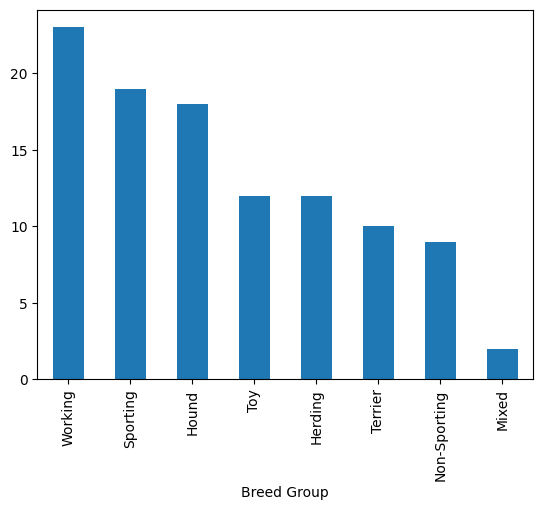

In [8]:
dogInfo['Breed Group'].value_counts().plot(kind='bar');

As you can see, bar charts are a great way to visualize categorical data. They show the number of occurrences of each category in the data. 

With a bar chart you can also quickly see:
- all of the categories in the data (breed groups in this case)
- which category (breed group) occurs most frequently
- which categories occur least frequently

### Your turn

Use the code cell below to create a bar chart for each of the columns in the dataset. As you create each chart, think about what the chart is showing you. Would you consider this to be a useful visualization of the data? Why or why not?
Fill in the first page of your activity guide as you go along.

After you see the charts for all of the columns, choose one to look at on page 2 of your activity guide. When it asks you to paste a graph, you can use the `Copy` button in the toolbar above the graph and then paste it into your activity guide.

## Histograms

Run the cell below to see a bar chart for the `Maximum Height` column. This column shows the maximum height you can expect each breed to reach, in inches. Notice that the x-axis and y-axis have been labelled for this chart. The x-axis shows each possible height, and the y-axis shows the number of breeds that might reach that height.

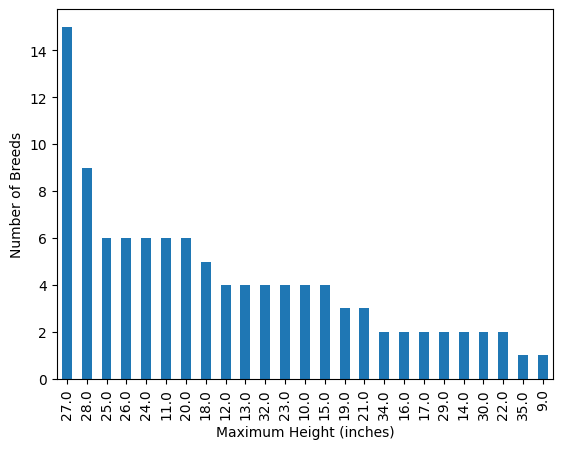

In [9]:
dogInfo['Maximum Height'].value_counts().plot(kind='bar', 
                                              ylabel='Number of Breeds',
                                              xlabel='Maximum Height (inches)');

This chart has a few problems. The bars are sorted largest to smallest rather than by the maximum height and the chart is a bit cluttered because there are so many different heights. We can solve the first problem by sorting the data before plotting it. 

In the cell below, add a call to the `sort_index` function to the data before plotting it. This will sort the counts by the index (in this case, the index is the height). You should end up with something like `...value_counts().sort_index().plot(...`. Run the cell and compare the chart with the previous one. What do you notice?

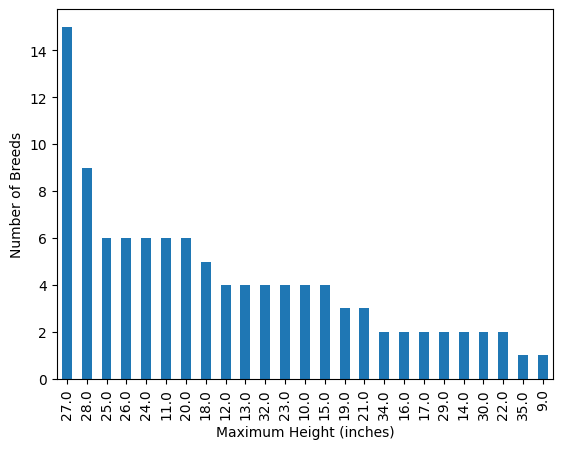

In [10]:
dogInfo['Maximum Height'].value_counts().plot(kind='bar', 
                                              ylabel='Number of Breeds',
                                              xlabel='Maximum Height (inches)');

That makes the axis looks a lot better, with the data in an order that makes sense, but the chart is still crowded. We can fix this by using a histogram instead of a bar chart. A histogram groups the data into bins and shows the number of occurrences in each bin. This can make it easier to see patterns in the data.

Instead of using `value_counts`, we can use the `hist` function to create a histogram. The `hist` function takes a `bins` parameter that specifies the number of bins to use. Run the cell below to see a histogram of the `Maximum Height` column with 5 bins.

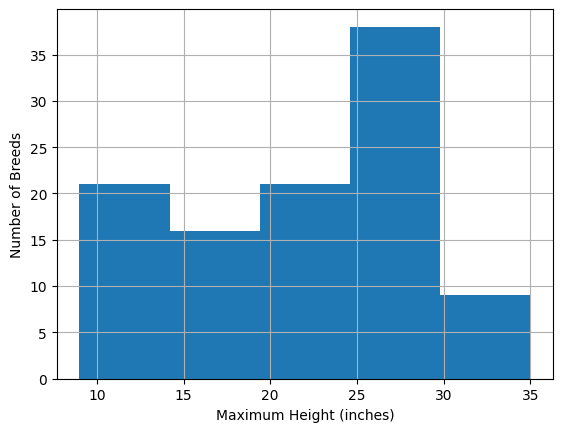

In [11]:
plt = dogInfo['Maximum Height'].hist(bins=5) # Hist doesn't allow xlabel, so we
plt.set_xlabel('Maximum Height (inches)')    # need a variable and call set_xlabel 
plt.set_ylabel('Number of Breeds');		  	 # and set_ylabel on it 


Notice that the bars are now wider and grouped together. This makes it easier to see patterns in the data. The x-axis now shows ranges of heights instead of individual heights. This can make it easier to see trends in the data, but the numbers shown on the x-axis aren't aligned with the bars. We can fix this by telling pandas to where to draw the x-axis 'ticks' or by changing the `bins` parameter to specify the ranges of the bins. This second option is more flexible, so we'll use that for now.

In the cell below, change the `bins` parameter to a list of the ranges for each bar. For example, if you want to use bins of size 10, you can use `bins=[0, 10, 20, 30, 40]`. Run the cell and compare the chart with the previous one. What do you notice?

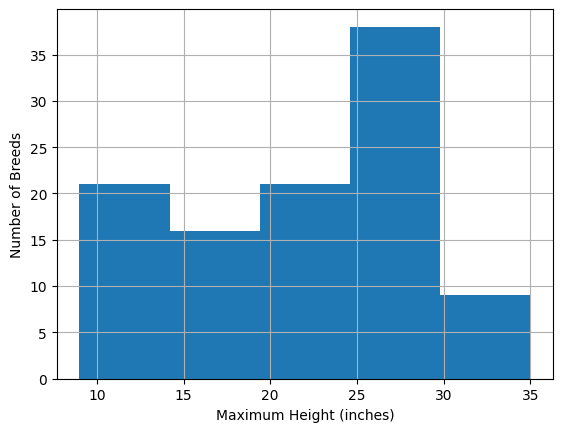

In [12]:
plt = dogInfo['Maximum Height'].hist(bins=5)
plt.set_xlabel('Maximum Height (inches)')
plt.set_ylabel('Number of Breeds');

Notice that you specified 5 numbers `[0, 10, 20, 30, 40]` but there are only 4 bars. This is because the numbers you gave are the *edges* of the bins. The first number is the lower bound of the first bar and the last number is the upper bound of the last bin. Each bin represents the space *between* two numbers. You can use this to create bins of different sizes. For example, if you want to use bins of size 10, 15, and 20, you can use `bins=[0, 10, 25, 45]`. Try changing the `bins` parameter to use bins of size 10, 15, and 20 and see what happens (hint: since there are 3 commas between the numbers, there will be 3 bars).

Last, let's see how we can have pandas automatically determine the bin sizes. If we tell pandas to use a certain number of bins, it will automatically determine the bin sizes. We then need to figure out what the edges of the bins will be. For this we have to figure out the edges using panda's `cut` function, asking it to "return the bins". This function will then return the edges of the bins that pandas will use. Try running the cell below to see the edges of the bins that pandas will use.

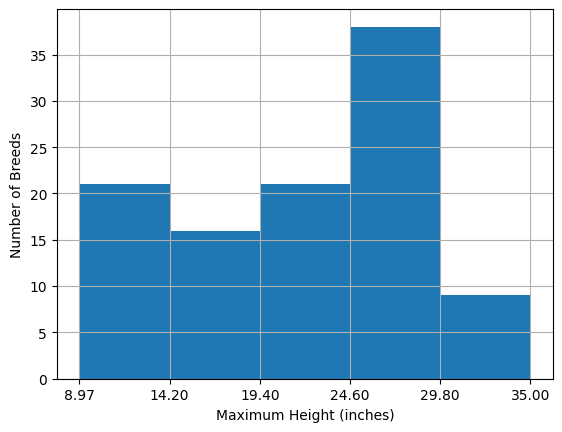

In [13]:
# Precalculate the edges of the bins. cut returns both the ranges for the bins
# and the bin edges the ranges aren't helpful here, so we use the underscore to
# ignore them
_, edges = pandas.cut(dogInfo['Maximum Height'], bins=5, retbins=True)

plt = dogInfo['Maximum Height'].hist(bins=5)
plt.set_xlabel('Maximum Height (inches)')
plt.set_ylabel('Number of Breeds')
plt.set_xticks(edges); # set the x-ticks to the bin edges we calculated

### Your turn

Use the code cell below to create a histogram for the 'Maximum Weight' column. Try using different numbers of bins and different bin sizes to see how it affects the chart. What do you notice? Would you consider this to be a useful visualization of the data? Why or why not? Fill in the 3rd page of your activity guide when you find a good bin size.

Use the code cell below to create a histogram for one other column in the dataset. Try using different numbers of bins and different bin sizes to see how it affects the chart. Fill in the 4th page of your activity guide when you find a good bin size.